<a href="https://colab.research.google.com/github/HssngH/ToBigs18/blob/main/%5B%ED%88%AC%EB%B9%85%EC%8A%A4_18%EA%B8%B0_%EC%A0%95%EA%B7%9C%EC%84%B8%EC%85%98%5D_2%EC%A3%BC%EC%B0%A8_Regression_%EA%B3%BC%EC%A0%9C_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [113]:
data = pd.read_csv("./drive/MyDrive/Colab Notebooks/ToBigs/week2_regression&optimization/assignment3_creditcard.csv")

In [114]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

In [116]:
# X, y값 설정해주기
y = data['Class']
X = data.drop(['Class'], axis=1)

In [117]:
y.value_counts()
# 0의 값이 28432, 1의 값이 246으로 한쪽으로 치우쳐저 있음을 알 수 있다. 

0    28432
1      246
Name: Class, dtype: int64

In [118]:
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.007183,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.827420,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-4.619034,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.459073,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,0.002111,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.467781,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,5.228342,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133


In [119]:
# 성능 개선 전에, 먼저 회귀분석 진행해보고 성능 확인하기
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

In [120]:
# 모형
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [121]:
# y 예측값 확인해주기
y_pred = model.predict(X_test) 

In [122]:
# 성능 평가해주기
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

def metrics(y_pred, y_test):
    f1 = f1_score(y_pred, y_test)
    cfmat = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    acc = (tp + tn)/(fn + fp + tn + tp)
    pre = (tp) / (tp + fp)
    recall = (tp) / (tp + fn)
    print('f1_score :', f1)
    print('confusion_matrix :', cfmat)
    print('정확도 accuracy :', acc)
    print('정밀도 precision :', pre)
    print('재현율 recall :', recall)

In [123]:
metrics(y_pred, y_test)

f1_score : 0.7659574468085106
confusion_matrix : [[5678    2]
 [  20   36]]
정확도 accuracy : 0.9961645746164575
정밀도 precision : 0.9473684210526315
재현율 recall : 0.6428571428571429


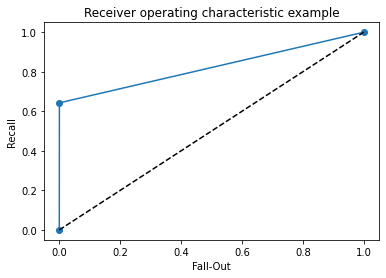

auc :  0.8212525150905431


In [124]:
# ROC 커브 그리기
fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label = 1)

plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.show()

print("auc : ", auc(fpr, tpr))
# AUC값은 ROC 곡선 아래 너비
# 1에 가까울 수록 좋음
# 현재 모델의 AUC값은 0.821

# 성능 개선하기

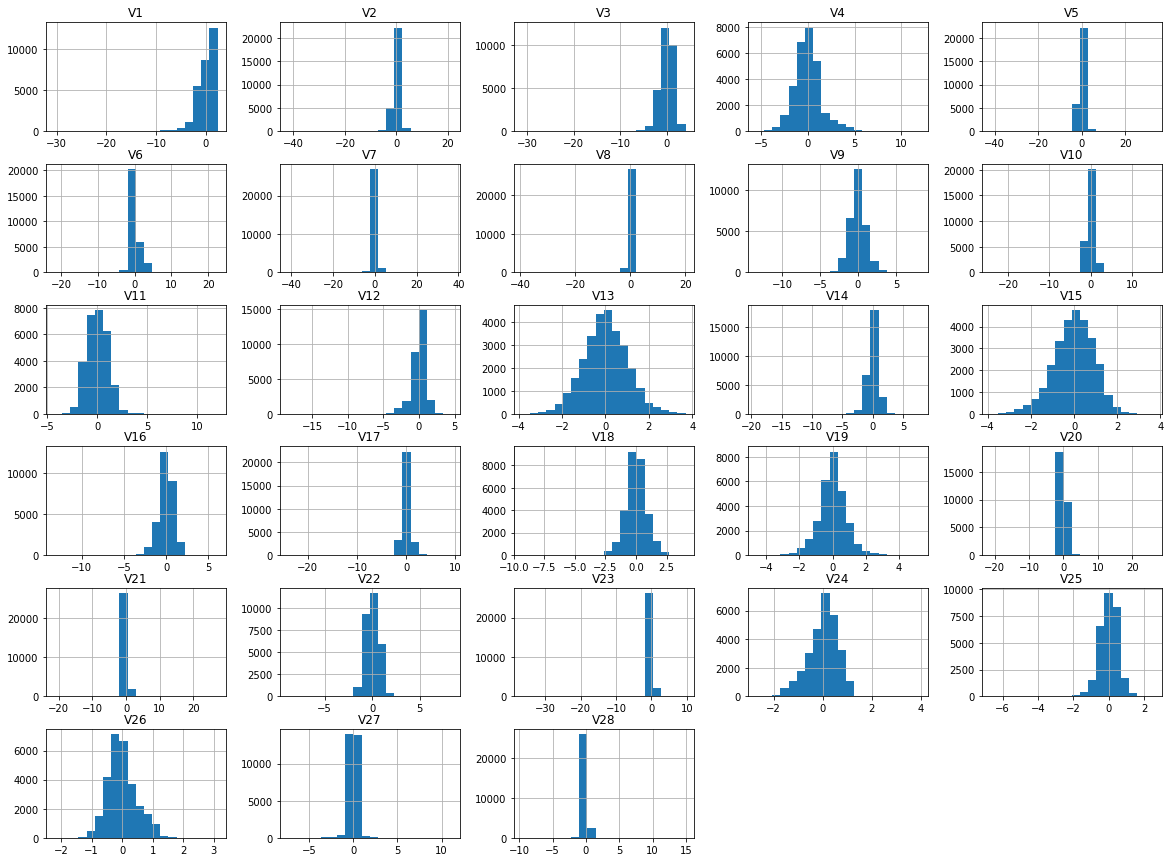

In [125]:
# 변수별로 데이터 분포 확인하기
X.hist(bins=20, figsize=(20,15));
# 한쪽으로 치우쳐져 있는 변수들이 많기 때문에, scaling 해주기

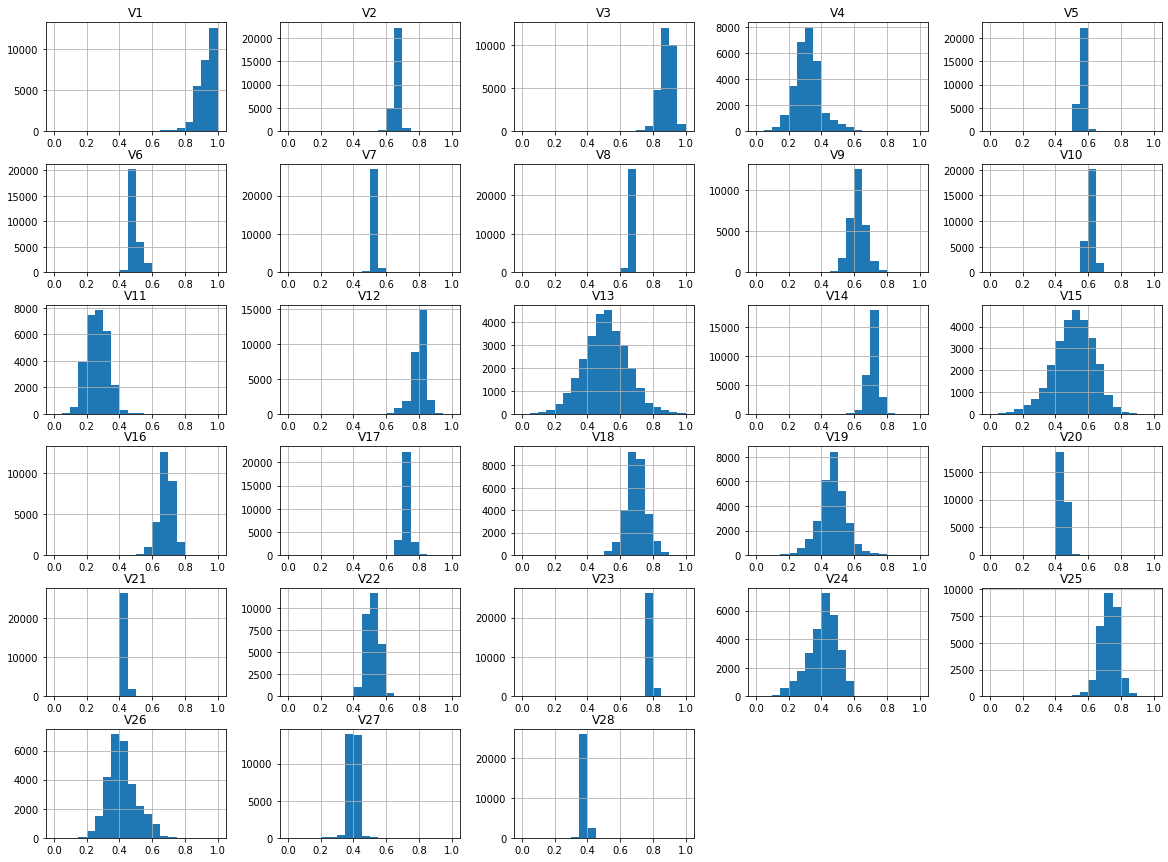

In [126]:
# MinMaxsclaer 사용해서 scaling해주고 변수별로 분포 확인하기
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)

# 그래프 그려주기
X_scaled.hist(bins=20, figsize=(20,15));

In [127]:
# train, test 분배할 때 0과 1의 균형에 따라 나누어주기
# stratify 사용하기
# 원래 데이터의 분포와 유사하게 데이터 추출해준다
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 123, stratify=y)

In [128]:
# 모형
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [129]:
# y 예측값 확인해주기
y_pred = model.predict(X_test) 

In [130]:
metrics(y_pred, y_test)

f1_score : 0.75
confusion_matrix : [[5686    1]
 [  19   30]]
정확도 accuracy : 0.9965132496513249
정밀도 precision : 0.967741935483871
재현율 recall : 0.6122448979591837


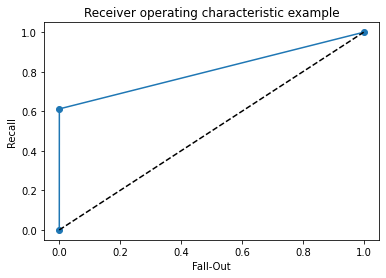

idx: 1 , threshold: 1
auc :  0.806034529162465


In [135]:
# ROC 커브 그리기
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.show()

In [146]:
# roc 데이터 프레임 만들고 최적의 임계값 확인하기
roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,2
1,0.000176,0.612245,1
2,1.000000,1.000000,0
